## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Warstwa splotowa - ang. convlolution layer.

Analiza obrazu o rozdzielczości 10M pikseli z użyciem sieci w pełni połączonej wymaga

$$
{\huge
(10M +1)\times N_\text{neuronów}
}
$$

wag już w pierwszej warstwie ukrytej. Taka duża liczba wag jest trudna w treningu. W szczególności jest podatna na przetrenowanie, co widać na przykładzie zbioru MNIST.

W 1998 roku zaproponowano architekturę z warstwami współdzielącymi wagi - [LeNet](https://ieeexplore.ieee.org/document/726791).
Warstwy ze współdzieleniem wag są obecnie nazywane warstwami splotowymi, ang. `convolution layer`. Sieci wykorzystujące takie warstwy to
sieci konwolucyjne, ang. `convolution neural network, CNN`

Źródło rysunków: [A guide to convolution arithmetic for deep learning, arXiv:1603.07285](https://arxiv.org/abs/1603.07285)

- **jądro, ang. `kernel/filter`** - zbiór wag wspólny dla całego obrazu. Jądro zwykle ma podstać macierzy kwadratowej.

![image.png](attachment:a80d4b84-8908-453f-acf8-614750de2591.png)

- **pole recepcyjne** - obszar objęty zbiorem różnych wag. Pole recepcyjne przesuwa się po obrazie

![image.png](attachment:6d3f5d70-8c28-48f3-a325-a1b55b4f690b.png)

* **krok, ang. stride** - liczba indeksów o jakie przesuwa się pole recepcyjne. Tutaj `stride=1`

![image.png](attachment:01324755-a74b-4d50-a0f3-73968d0e61e8.png)


* **wypełnienie, ang. padding** - sposób rozszerzenia obrazu w celu uzyskania pożądanego kształtu wyniku warstwy konwolucyjnej, np. zachowania tego samego kształtu dla kolejnych warstw konwolucyjnych. Tutaj: wypełnienie zerami, ang. `zero padding`.

![image.png](attachment:86e8bf6f-92a7-48ba-8368-79b945e99230.png)


* **dylatacja** - odstęp między elementami pola recepcyjnego. Odstęp wynosi `d-1` - czyli brak odstępu odpowiada `d=1`

![image.png](attachment:58c599d0-dd01-42f2-a34d-36fb76798dfc.png)

![image.png](attachment:bb5d8779-bc80-4845-979f-1a2cf681b8ca.png)

Interfejs użytkownika warstwy splotowej w Keras:

```Python
tf.keras.layers.Conv2D(
    filters,                    # liczba filtrów
    kernel_size,                # rozmiar filtra: krotka (n,m), lub (n) dla filtrów kwadratowych
    strides=(1, 1),             # wartość kroku w obu wymiarach
    padding='valid',            # sposób dopełnienia:
                                # `valid` - brak dopełnienia
                                # `same` - dopełnienie zerami na brzegach, tak by wyjście miało ten sam rozmiar
                                #  przestrzenny, co wejście: (batch size, liczba filtrów, H, W).
                                # dopełnienie wynosi połowę rozmiaru filtra w odpowiednim kierunku
    data_format=None,           # specyfikacja kolejności wymiarów:
                                # "channels_first" - (batch size, liczba kanałów, H, W)
                                # "channels_last" - (batch size, H, W, liczba kanałów) <-- domyślne w TF
    dilation_rate=(1, 1),       # dylatacja (n,m) - splot bierze co (n-1, m-1) element w polu recepcyjnym
    groups=1,                   # liczebność grup kanałów, które mają wspólne wagi.
    ...                         # pozostałe, standardowe argumenty warstwy: inicjalizacja wag, regularyzacja, itd.
)
```

**Uwaga:** warstwy w środowisku `Keras` zakładają, że dane wejściowe są podawane w postaci paczek, `batches`.

**Proszę**:

* zbudować warstwę splotową z jednym filtrem o rozmiarze `(3,3)` i pozostałych parametrach z domyślnymi wartościami
* podać na jej wejściu rysunek wypełniony jedynkami o rozmiarze `(16,16)` i jednym kanale kolorów
* wypisać na ekran kształt wejścia i wyjścia warstwy

**Wskazówki:**
* uwaga na kształt danych wejściowych : `(batch size, height, width, channels)`

In [11]:
graf = np.ones((1,16,16,1))
karnel_size = (3,3)
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size = karnel_size)
print(colored("Input shape: ", "green"), graf.shape)
print(colored("Output shape: ", "green"), layer(graf).shape)

Input shape:  (1, 16, 16, 1)
Output shape:  (1, 14, 14, 1)


**Proszę**:

* zbudować warstwę splotową z jednym filtrem o rozmiarze `(3,3)` i wypełnianiem ustawionym na `same`
* podać na jej wejściu wypełniony jedynkami rysunek o rozmiarze `(16,16)` i jednym kanale kolorów
* wypisać na ekran kształt wejścia i wyjścia warstwy

In [12]:
graf = np.ones((1,16,16,1))
karnel_size = (3,3)
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size = karnel_size, padding="same")
print(colored("Input shape: ", "green"), graf.shape)
print(colored("Output shape: ", "green"), layer(graf).shape)
pass

Input shape:  (1, 16, 16, 1)
Output shape:  (1, 16, 16, 1)


**Proszę:**

* wydobyć z warstwy splotowej macierz filtra (czyli wagi warstwy) i wypisać ją na ekran

**Wskazówki:**

* wagi warsty są inicjalizowane po pierwszym wykonaniu operacji warstwy:
```Python
layer(data)
print(colored("kernel shape:","blue"),layer.weights[0].shape)
```
* uwaga na kształt danych wejściowych : `(batch, height, width, channels)`
* uwaga na kształt macierzy filtrów

In [36]:
graf = np.ones((1,16,16,1))
karnel_size = (3,3)
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size = karnel_size, padding="valid")
layer(graf)
print(colored("Input shape: ", "green"), graf.shape)
print(colored("Output shape: ", "green"), layer(graf).shape)
print(colored("Kernel shape: ", "blue"), layer.weights[0].shape)
#print(colored("Kernel weights: \n", "blue"), layer.weights[0].numpy())
print(colored("Kernel weights: \n", "blue"), layer.weights[0][:,:,0,0].numpy())
pass

Input shape:  (1, 16, 16, 1)
Output shape:  (1, 14, 14, 1)
Kernel shape:  (3, 3, 1, 1)
Kernel weights: 
 [[ 0.45976877 -0.19257215  0.34962744]
 [-0.29020897  0.06686068  0.00725776]
 [-0.4825387   0.4508177   0.3224584 ]]


**Proszę:**

* zadać nowy filtr w postaci:

$$
\Large{
\begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}
}
$$
* uruchomić filtr na macierzy `(3,3)` wypełnionej zerami z oboma wariantami wypełniania: `valid` i `same`

**Wskazówki:**
* proszę użyć własnej klasy inicjalizującej wagi na zadaną macierz:
* TF >=2.16.1: proszę użyć własnej klasy inicjalizującej wagi na zadaną macierz:

```Python
kernel_initializer = customInitializer(kernel)
```

* TF <2.16.1: proszę użyć inicjalizatora wag `tf.keras.initializers.Constant(...)`

In [40]:
try:
    class customInitializer(tf.keras.Initializer):
        def __init__(self, kernel):
            self.kernel = kernel

        def __call__(self, shape, dtype=None, **kwargs):
            x = tf.reshape(self.kernel, shape)
            x= tf.cast(x, dtype)
            return x
except AttributeError:
    print(colored("tf.keras.Initializer not available","red"))
    print(colored("TF version:","blue"),tf.__version__)
    pass

In [50]:
graf = np.ones((1,3,3,1))
karnel_size = np.array([[0.0, 1.0, 0.0],
                        [1.0, 0.0, 1.0],
                        [0.0, 1.0, 0.0]])
kernel_initializer = customInitializer(karnel_size)
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size = (3,3), activation="linear", padding="valid", kernel_initializer=kernel_initializer)
layer(graf)
print(colored("Valid", 'red'))
print(colored("Input shape: ", "green"), graf.shape)
print(colored("Output shape: ", "green"), layer(graf).shape)
print(colored("Kernel shape: ", "blue"), layer.weights[0].shape)
#print(colored("Kernel weights: \n", "blue"), layer.weights[0].numpy())
print(colored("Kernel weights: \n", "blue"), layer.weights[0][:,:,0,0].numpy())
print(colored("Output with same padding:\n","blue"), layer(graf)[0,:,:,0])


graf = np.ones((1,3,3,1))
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size = (3,3), activation="linear", padding="same", kernel_initializer=kernel_initializer)
layer(graf)
print(colored("Same", 'red'))
print(colored("Input shape: ", "green"), graf.shape)
print(colored("Output shape: ", "green"), layer(graf).shape)
print(colored("Kernel shape: ", "blue"), layer.weights[0].shape)
#print(colored("Kernel weights: \n", "blue"), layer.weights[0].numpy())
print(colored("Kernel weights: \n", "blue"), layer.weights[0][:,:,0,0].numpy())
print(colored("Output with valid padding:\n","blue"), layer(graf)[0,:,:,0])

Valid
Input shape:  (1, 3, 3, 1)
Output shape:  (1, 1, 1, 1)
Kernel shape:  (3, 3, 1, 1)
Kernel weights: 
 [[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]
Output with same padding:
 tf.Tensor([[4.]], shape=(1, 1), dtype=float32)
Same
Input shape:  (1, 3, 3, 1)
Output shape:  (1, 3, 3, 1)
Kernel shape:  (3, 3, 1, 1)
Kernel weights: 
 [[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]
Output with valid padding:
 tf.Tensor(
[[2. 3. 2.]
 [3. 4. 3.]
 [2. 3. 2.]], shape=(3, 3), dtype=float32)


Przygotujmy rysunek o rozmiarze `(32,32)` z losowo umieszczonymi kwadratami `(3,3)`

Kształty wygenerujemy z użyciem funkcji `skimage.draw.random_shapes`.

Image shape: (32, 32)


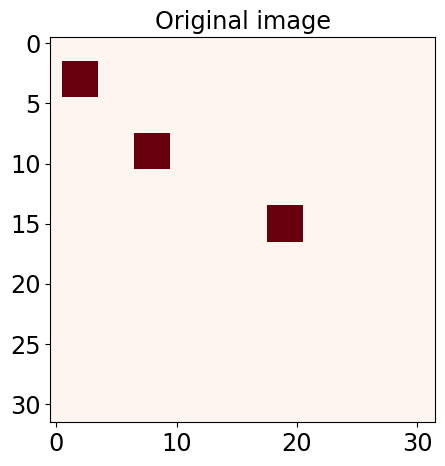

In [55]:
from skimage.draw import random_shapes
result = random_shapes((32, 32), max_shapes=3,
                       shape='rectangle',
                       min_size = 3,
                       max_size = 3,
                       intensity_range = (1,1),
                       channel_axis=None, rng=0)
image, labels = result

#Change colors: background - white, shapes - black
image = np.where(image==255, 0, image).astype(np.float32)
print(colored("Image shape:","blue"),image.shape)

fig, axis = plt.subplots(1, 1, figsize=(5,5))
axis.imshow(image, cmap='Reds')
axis.set_title('Original image');

**Proszę:**

* przygotować warstwy splotowe z dwoma filtrami **w jednej warstwie**:
    * kwadratowym:
$$
\Large{
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
}
$$    
    * liniowym
  $$
\Large{
\begin{bmatrix}
0 & 1 & 0\\
0 & 1 & 0 \\
0 & 1 & 0
\end{bmatrix}
}
$$

In [107]:
rect_kernel = np.array([[1.0, 1.0, 1.0],
                        [1.0, 1.0, 1.0],
                        [1.0, 1.0, 1.0]])
linear_kernel = np.array([[0.0, 1.0, 0.0],
                          [0.0, 1.0, 0.0],
                          [0.0, 1.0, 0.0]])

kernel = np.stack((rect_kernel, linear_kernel), axis=2)

kernel_initializer = customInitializer(kernel)
layer = tf.keras.layers.Conv2D(filters = 2, kernel_size = (3,3), activation="linear", padding="valid", kernel_initializer=kernel_initializer)

pass

**Proszę:**

* wykonać operację warstwy na rysunkach z kwadratami
* narysować oryginalny rysunek i rysunki powstałe na wyjściu obu filtrów

**Wskazówki:**
* uwaga na kształt danych wejściowych - trzeba dodać wymiary `batch` i `channel`
* macierze dla dwu filtrów można uzyskać przez składanie macierzy dla pojedynczych filtrów:
  ```Python
  
  kernel = np.stack( (rect_kernel, linear_kernel), axis=2)
  ```
  <br></br>
* proszę sprawdzić kształt wyniku zwróconego przez warstwę splotową

Filter 0:  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)
Filter 1:  tf.Tensor(
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]], shape=(3, 3), dtype=float32)
Rec output shape:  (30, 30)
Lin output shape:  (30, 30)


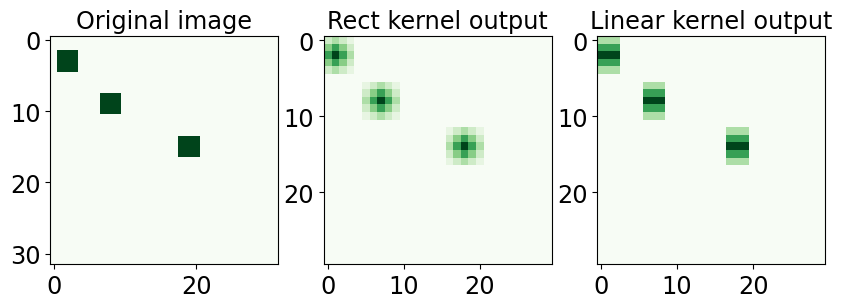

In [108]:
image = np.where(image==255, 0, image).astype(np.float32)


#data = np.expand_dims(image, axis=0)
#data = np.expand_dims(data, axis=3)

layer_output = layer(image[None,:,:,None])

print(colored("Filter 0: ", 'blue'), layer.weights[0][:,:,0,0])
print(colored("Filter 1: ", 'blue'), layer.weights[0][:,:,0,1])

print(colored("Rec output shape: ", "green"), layer_output[0,:,:,0].shape)
print(colored("Lin output shape: ", "green"), layer_output[0,:,:,1].shape)

fig, axis = plt.subplots(1, 3, figsize=(10,5))

axis[0].imshow(image, cmap='Greens')
axis[0].set_title('Original image');

axis[1].imshow(layer_output[0,:,:,0], cmap='Greens')
axis[1].set_title('Rect kernel output');

axis[2].imshow(layer_output[0,:,:,1], cmap='Greens')
axis[2].set_title('Linear kernel output');
pass

**Proszę:**

* wypisać na ekran maksymalne wartości pikseli dla kanałów wyjściowego obrazu
* narysować wyjściowe obrazy zachowując piksele o wartości powyżej maksymalnej dla kanału z filtrem liniowym. Zachowane piksele proszę ustawić na wartość `1`

**Wskazówki:**
* maksymalną wartość macierzy można uzyskać przez funkcję `tf.math.reduce_max(...).numpy()`
* piksele można ustawić na wartość `1` wypisując warunek logiczny na ich warość:
```Python
layer_output[0,:,:,0]>threshold
```

Maximum value:  9.0
Maximum value:  3.0


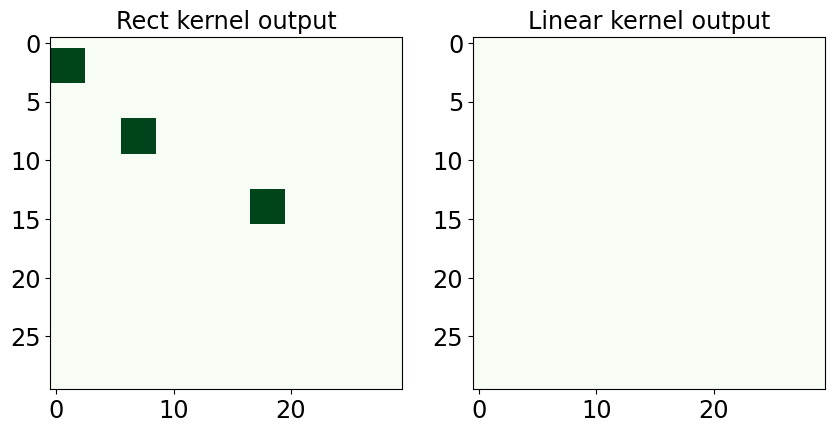

In [109]:
print(colored("Maximum value: ", "green"), tf.math.reduce_max(layer_output[0,:,:,0]).numpy())
print(colored("Maximum value: ", "green"), tf.math.reduce_max(layer_output[0,:,:,1]).numpy())
treshold = tf.math.reduce_max(layer_output[0,:,:,1]).numpy()

fig, axis = plt.subplots(1, 2, figsize=(10,5))



axis[0].imshow(layer_output[0,:,:,0] > treshold, cmap='Greens')
axis[0].set_title('Rect kernel output');

axis[1].imshow(layer_output[0,:,:,1] > treshold, cmap='Greens')
axis[1].set_title('Linear kernel output');
pass

Warstwy splotowe generują nowe obrazy. Zwykle rozdzielczość nowego obrazu jest taka jak obrazu wejściowego, ale liczba kanałów, "kolorów/kanałów" wzrasta.
Redukcja rozdzielczości jest uzyskiwana przez warstwy łączące, ang. `pooling layers`.

Warstwy łączące mają, podobnie jak dla warstwy splotowej, wąskie pole recepcyjne, ale nie mają żadnych wag, czyli parametrów podlegających treningowi - ang. `learning parameters`. Warstwy łączące zawsze wykonują tę samą operację zdefiniowaną dla danej warstwy:

* **masksimum, ang. max pooling** - maksymalna wartość w polu recepcyjnym

![image.png](attachment:f9b36717-778c-4955-b7c0-41f93f07e974.png)

* **średnia, ang. average pooling** - średnia wartość w polu recepcyjnym

![image.png](attachment:7a09b570-6e1d-4276-af7e-ad1ca87027bb.png)

Najbardziej popularna jest warstwa wyciągająca maksimum - `MaxPooling`

Interfejs użytkownika warstwy wyciągającej maksimum w Keras:

```Python
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),           # rozmiar pola recepcyjnego
    strides=None,               # wartość kroku w obu wymiarach
    padding='valid',            # sposób dopełnienia:
                                # `valid` - brak dopełnienia
                                # `same` - dopełnienie zerami na brzegach, tak by wyjście miało ten sam rozmiar
                                #  przestrzenny, co wejście: (batch size, liczba filtrów, W, H)
    data_format=None,           # specyfikacja kolejności wymiarów:
                                # "channels_first" - (batch size, liczba kanałów, W, H)
                                # "channels_last" - (batch size, W, H, liczba kanałów) <-- domyślne w TF
)
```

**Proszę:**

* wykonać operację `MaxPooling2D` na obrazach wyjściowych z warstwy splotowej z filtrami kwadratowym i liniowym
* użyć domyślnych parametrów warstwy łączącej
* narysować wynik

Max pool output shape:  (29, 29)


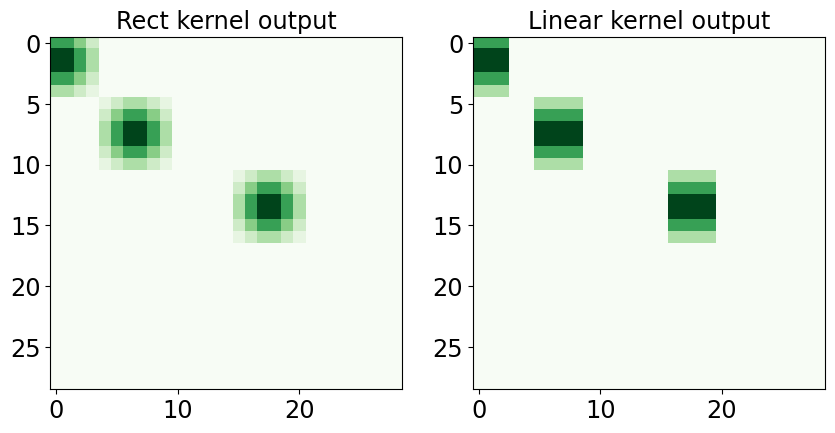

In [119]:
layer2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid")
layer2_output = layer2(layer_output)
print(colored("Max pool output shape: ", "green"), layer2_output[0,:,:,0].shape)


fig, axis = plt.subplots(1, 2, figsize=(10,5))



axis[0].imshow(layer2_output[0,:,:,0], cmap='Greens')
axis[0].set_title('Rect kernel output');

axis[1].imshow(layer2_output[0,:,:,1], cmap='Greens')
axis[1].set_title('Linear kernel output');

pass

Standardowa architektura sieci analizującej obrazy zawiera przekładaniec warstw splotowych i łączących, zakończony warstwami w pełni połączonymi:

![image.png](attachment:67324852-8771-4ff8-ab5f-9d41eac41319.png)

Zbiór obrazów uzyskany przez poszczególne filtry nazywany jest mapą cech, ang. `feature map`. Filtry są nazywane cechami, `features`.

## Klasa tf.keras.Sequential

Model składający się z sekwencji warstw może być stworzony przy użyciu klasy `tf.keras.Sequential`:
```Python
tf.keras.Sequential(
    layers=None, # lista warstw modelu
    name=None    # nazwa modelu
)
```

### Składanie modelu warstwa po warstwie:

In [120]:
model = tf.keras.Sequential(name="test_1")
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(16))
model.summary()

Model: "test_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 280 (1.09 KB)

 Trainable params: 280 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

### Definicja wielu warstw w jednym kroku:

In [121]:
model = tf.keras.Sequential(layers = [tf.keras.Input(shape=(16,)),
                                      tf.keras.layers.Dense(16),
                                      tf.keras.layers.Dense(8)],
                             name="test_2")
model.summary()

Model: "test_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408 (1.59 KB)

 Trainable params: 408 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

Zbudować, korzystająć z `tf.keras.Sequential()`, sieć splotową o nazwie `CNN_Digits`` i następującej strukturze:

* kształt danych wejściowych: `(28,28,1)`
* 3$\times$ blok:
    * warstwa `Conv2D`, `64` filtry, rozmiar filtra `3`, funkcja aktywacji: `ReLU`, padding: `same`
    * wartwa `MaxPooling`, rozmiar filtra `2`
* warstwa spłaszczająca:
```Python

tf.keras.layers.Flatten()
```

* warstwa gęsta, `128` neuronów, funkcja aktywacji: `ReLU`
* warstwa opuszczająca, z częstością `0.5`
* warstwa gęsta, `64` neuronów, funkcja aktywacji: `ReLU`
* warstwa opuszczająca, z częstością `0.5`
* warstwa wyjściowa dobrana do zagadnienia: **Klasyfikacja ręcznie pisanych cyfr**

Oczekiwany wynik:

![image.png](attachment:4e3bc582-ce9b-446e-8a90-f5dc412984a7.png)

In [166]:
model = tf.keras.Sequential(layers = [tf.keras.Input(shape=(28,28,1)),
                                      tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128, activation="relu"),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(64, activation="relu"),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, name = "output_layer", activation="softmax")],
                             name="test_2")
model.summary()
pass

Model: "test_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,258 (614.29 KB)

 Trainable params: 157,258 (614.29 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* załadować zbiór `emnist-digits-test` i podzielić go na części uczącą i testową w proporcjach `3:1`
* wypisać nma ekran kształ danych

In [167]:
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

datasetName = "emnist-digits-test"
datasetPath = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/EMNIST/gzip"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)

from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


* użyć funkcji  `trainModel(model, features, labels, nEpochs=200)` z modułu `emnist_functions`. Funkcja powinna wykonywać
  kroki związane z treningiem:
    * ustalenie harmonogramu współczynnika uczenia
    * ustalenie wczesnego zatrzymania trenowania na podstawie monitoringu funkcji straty na zbiorze walidacyjnych
        * jako zbioru walidacyjnego używać 10% danych wydzielonych ze zbioru uczącego przez ustawienie parametru
       ```Python
       
        validation_split=0.1
        
        ```
       w wywołaniu metody  `model.fit()`
    * rysowanie zmiany funkcji straty w kolejnych epokach
    * wypisanie na ekran wydajności modelu na zbiorze uczącym
* przeprowadzić trening i sprawdzenie wydajności sieci `CNN_Digits` na zbiorze testowym

Model: "test_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,258 (614.29 KB)

 Trainable params: 157,258 (614.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40


2025-04-23 11:42:21.730124: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3821 - loss: 2.8232 - val_accuracy: 0.9653 - val_loss: 0.1517
Epoch 2/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8870 - loss: 0.3893 - val_accuracy: 0.9773 - val_loss: 0.0977
Epoch 3/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9413 - loss: 0.2142 - val_accuracy: 0.9813 - val_loss: 0.0724
Epoch 4/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9522 - loss: 0.1772 - val_accuracy: 0.9797 - val_loss: 0.1025
Epoch 5/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9641 - loss: 0.1333 - val_accuracy: 0.9863 - val_loss: 0.0739
Epoch 6/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9685 - loss: 0.1199 - val_accuracy: 0.9863 - val_loss: 0.0618
Epoch 7/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9758 - loss: 0.0920 - val_accuracy: 0.9837 - val_loss: 0.0665
Epoch 8/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9776 - loss: 0.0860 - val_accuracy: 0.984

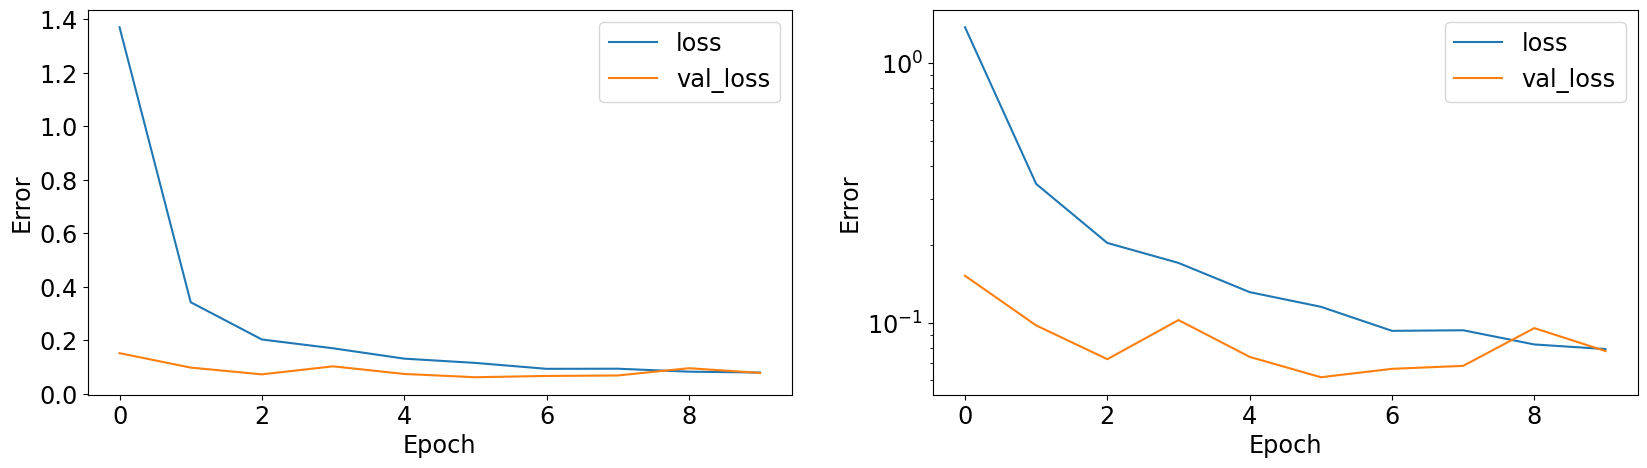

In [168]:
%%time
emnist_fcn.trainModel(model, x_train, y_train, nEpochs=40)
pass

**Proszę:**

* narysować osiem losowych przykładów ze zbioru testowego, w których odpowiedź modelu **nie** jest poprawna

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


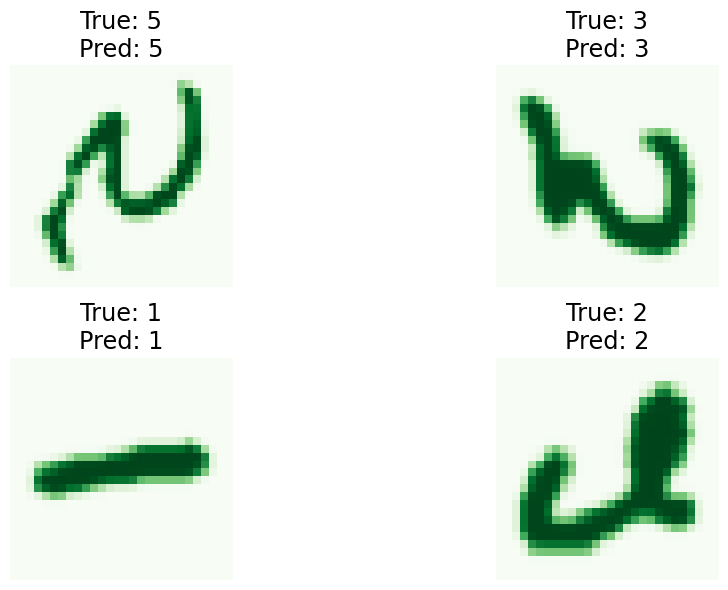

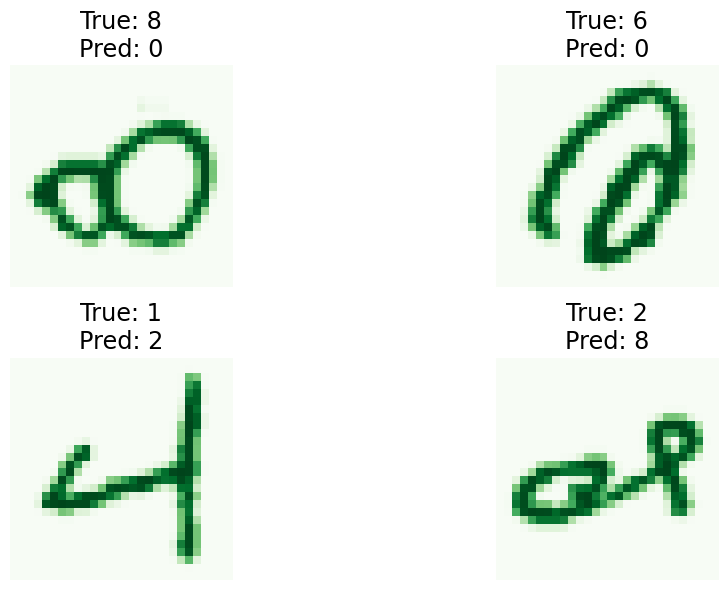

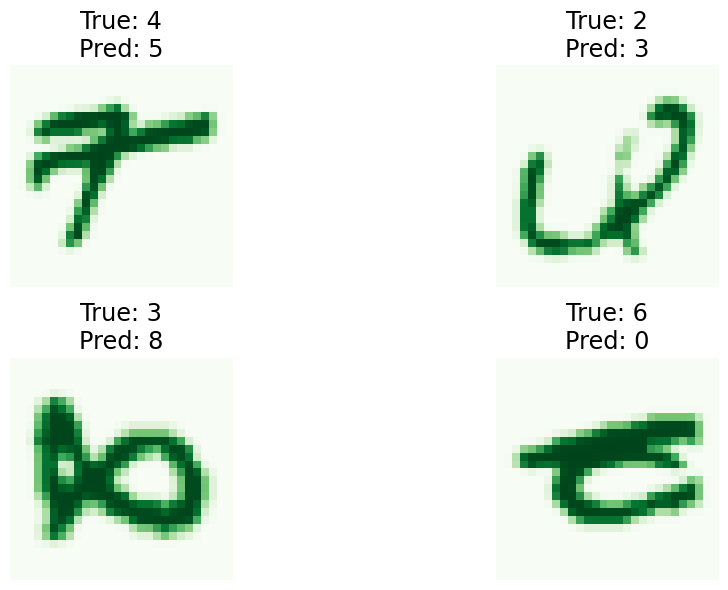

In [171]:
importlib.reload(emnist_fcn);

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
y_pred_test = np.argmax(y_pred_test, axis=1)
mask = y_test!= y_pred_test

emnist_fcn.plotMNIST(x_test, y_test, y_pred_test)

emnist_fcn.plotMNIST(x_test[mask], y_test[mask], y_pred_test[mask])
emnist_fcn.plotMNIST(x_test[mask], y_test[mask], y_pred_test[mask])
pass

In [170]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9832 - loss: 0.0815


[0.08146099001169205, 0.9832000136375427]

# Zadanie domowe

Trening klasyfikatora **konwolucyjnego** na zbiorze wielkich liter i cyfr ze zbioru `emnist-byclass-train`.

**Proszę:**

* wczytrać zbióry `emnist-byclass-train` i `emnist-byclass-test`(uwaga pliki są duże i długo ładują się na Colab!)
* wybrać przykłady o numerze klasy mniejszym niż 36, czyli cyfry i wielkie litery
* zdefiniować i przeprowadzić trening modelu. **Do definicji kodelu użyć klasy Sequential.**
* wypisać na ekran dokładność, `accuracy`, modelu na zbiorach treningowym i testowym
* dla zbiorów treningowego i testowego narysować macierze pomyłek z odpowiednimi etykietami na osiach
* wskazać klasy które słabo się separują
* odkodować komunikat zapisany w pliku [encoded.npz](http://studenci.fuw.edu.pl/~akalinow/encoded.npz)
    * plik zawiera macierz o kształcie `(-1,28,28)` którą można wczytać następująco:
    ```Python
    
    fileName = "encoded.npz"
    with open(fileName, 'rb') as file:
        encoded = np.load(file)
    ```
* odkodowany komunikat wypisać na ekran w postaci napisu:
```
Decoded message is: HELLO WORLD

```

**UWAGA**: Kod musi używać funkcji zdefiniowanych w module `emnist_functions`
i działać z przygotowanymi poniżej komórkami. Należy zdefiniować następujące funkcje:
  
* ```emnist_functions.getEMNIST(datasetName, datasetPath)``` - funkcja łądująca dane
* ```emnist_functions.preprocessData(x,y)``` - funkcja wybierająca podzbiór wielkich liter i cyfr
* ```emnist_functions.getConvModel(...)``` - funkcja zwracająca model do treningu.
* ```emnist_functions.trainModel(...)``` - funkcja trenująca i rysująca historię funkcji straty
* ```emnist_functions.plotTrainHistory(history)```
* ```emnist_functions.plotMNIST_CM(y_train,y_pred, label)``` - funkcja rysująca macierz pomyłek. Parametr `label` to napis "Training" lub "Validation"
* ```emnist_functions.decodeMessage(model, encoded)``` - funkcja dekodująca komunikat
* moduł `emnist_functions` powinien zawierać zmienne definiujące sieć:
  
  ```Python
  inputShape = ...
  nNeurons = ...
  lastClassNumber = 36
  nOutputNeurons = ...
  nEpochs = ...
  ```

In [ ]:
#Input data loading
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

datasetName = "emnist-byclass-train"
datasetPath = "../data/EMNIST/gzip/"
lastClassNumber = emnist_fcn.lastClassNumber

x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Training dataset","green"))
x_train, y_train = emnist_fcn.preprocessData(x,y)

datasetName = "emnist-byclass-test"
datasetPath = "../data/EMNIST/gzip/"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Test dataset","green"))
x_test, y_test = emnist_fcn.preprocessData(x,y)

In [ ]:
#model definition
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

inputShape = emnist_fcn.inputShapeConv
nOutputNeurons = emnist_fcn.nOutputNeurons
model = emnist_fcn.getConvModel(inputShape, nOutputNeurons)
nOutputNeurons = emnist_fcn.nOutputNeurons
model.summary()

In [ ]:
%%time
#model training
nEpochs = emnist_fcn.nEpochs
model = emnist_fcn.trainModel(model, x_train, y_train, nEpochs=nEpochs)

print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test);

In [ ]:
#evaluation
importlib.reload(emnist_fcn);
y_pred = tf.argmax(model.predict(x_train, batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_train, y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test,batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_test, y_pred,"Testing")

In [ ]:
#message decoding
importlib.reload(emnist_fcn);
fileName = "../data/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

emnist_fcn.decodeMessage(model, encoded)